# RW Fit

Here we fit the RW model to determine the learning rates for each simulated participant

In [32]:
import sys
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



sys.path.append('../../rw_models')
sys.path.append('rw_models')

from rw_optim import predict_exp

base_path = '/u/jschubert/learning_bias/meta-rl/optimism/data/exp/Transformer__150000__mode_train__num_layers_2__linear_size_192'

Merge simulations

In [10]:
# sim_files = glob.glob(f'{base_path}/simulation/*.csv')
# exp = (pd.read_csv(file) for file in sim_files)
# exp = pd.concat(exp, ignore_index=True)
# exp = exp.sort_values('test_part_idx')
# exp.to_csv(base_path+'simulation_all_part.csv')

Fit RW Model

In [ ]:
# df_sim = pd.read_csv(base_path+'simulation_all_part.csv')
# model_name = 'Transformer__150000__mode_train__num_layers_2__linear_size_192'

# q_inital = np.asarray([[.5,.5],[.5,.5],[.5,.5],[.5,.5]])
# random_alpha_range = (0,1) # samples uniformly in between this range as an inital guess for alpha
# random_beta_range = (0,5) # and for beta respectively.
# optim_bounds = ([0,1],[0, np.inf]) #alpha, beta | bounds during optimization
# n_optim_inits = 10 # how often the optimization procedure is repeated

# actions = df_sim.pivot(index='test_part_idx',columns='trials_idx',values='actions').values.astype(int)
# rewards = df_sim.pivot(index='test_part_idx',columns='trials_idx',values='rewards').values
# cues = df_sim.pivot(index='test_part_idx',columns='trials_idx',values='cues').values.astype(int)

# pipeline = predict_exp(random_alpha_range, random_beta_range, q_inital, n_optim_inits, optim_bounds, concatenated_trial=False)        
# df = pipeline.fit(actions,rewards,cues,bounded=True)
# df['bic_dif'] = df['c_bic'] - df['pm_bic']
# df['is_pm'] = df['bic_dif'] >= 0
# df['c_1/b'] = 1 / df['c_b']
# df['pm_1/b'] = 1 / df['pm_b']
#df.to_csv(base_path+"/rw_fit_of_participant.csv", index=False, mode='x')

Plot Average

In [34]:
df = pd.read_csv(base_path+"/rw_fit_of_participant.csv")
df.describe()[['pm_bic', 'c_bic', 'p_a', 'm_a', 'pm_b']].round(2)

,pm_bic,c_bic,p_a,m_a,pm_b
count,50.00,50.00,50.00,50.00,50.00
mean,51.32,99.33,0.14,0.04,924.11
std,18.13,24.41,0.23,0.14,2149.40
min,19.24,50.06,0.00,0.00,2.93
25%,40.39,81.79,0.00,0.00,24.15
50%,52.30,98.60,0.02,0.00,464.01
75%,57.57,120.74,0.20,0.02,1052.54
max,92.22,142.21,1.00,0.96,14779.04


Plot BIC

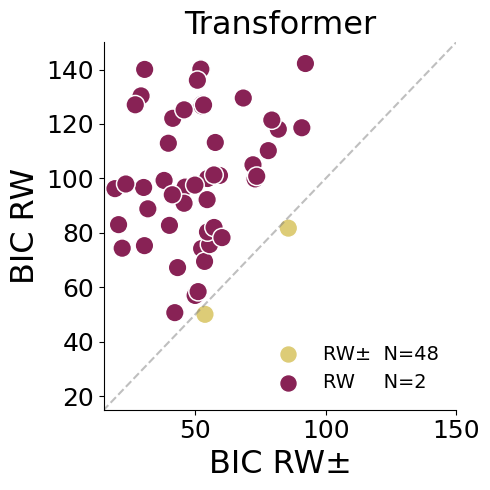

In [31]:
fig, axs = plt.subplots(1,1, dpi=100, figsize=(5,5), sharey=True)
title= ['Transformer']

for i in range(1):   
    ax = axs
    plt_df = df
    sns.scatterplot( x=plt_df[('pm_bic')], y=plt_df[('c_bic')], hue=plt_df['is_pm'], ax=ax, palette=['#DDCC77', '#882255'], s=180)
    sns.despine(ax=ax)
    ax.plot([0,150],[0,150],linestyle='dashed',color='grey',alpha=.5)
    ax.set_xlim((15,150))
    ax.set_ylim((15,150))
    ax.set_ylabel('BIC RW', fontsize=23)
    ax.set_xlabel('BIC RW±', fontsize=23)
    ax.tick_params(labelsize=18)
    rwpm = str(np.sum(plt_df.is_pm))
    nrwpm = str(np.sum(~plt_df.is_pm))

    ax.set_title(title[i], fontsize=23)

    # replace legend with text "Subjects" False = RW, True = RW±
    handles, labels = ax.get_legend_handles_labels()
    order=[1,0]
    ax.legend(handles= handles, labels=[f'RW± N='+rwpm, 'RW   N='+nrwpm], loc='lower right', frameon=False, fontsize=14, markerscale=1.8)

#plt.suptitle('Model comparison of RW and RW± in terms of BIC', fontsize=20)
plt.tight_layout()
plt.show()

fig.tight_layout()
#fig.savefig('bic.png', format='png', bbox_inches='tight')

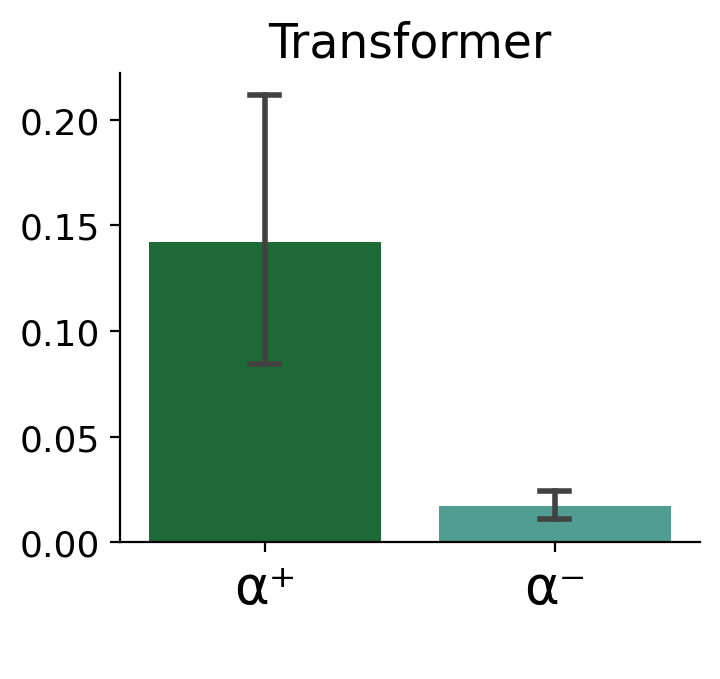

In [24]:
fig, axs = plt.subplots(1,1, figsize=(3.7,3.5), dpi=200, sharey=True)

title= ['Transformer']

for i in range(1):   
    ax = axs
    plt_df = df
    plt_df = plt_df[plt_df.is_pm == True]
    scatter_pm = plt_df[[('p_a'),('m_a')]]
    scatter_pm_melted = scatter_pm.melt()
    fig_args = {'x': 'variable',
                'y': 'value',
                'data': scatter_pm_melted,
                'capsize':0.1,
                'errwidth':2,
                'palette': ['#117733', '#44AA99']}
    pairs = [(('p_a', 'm_a'))]


    sns.barplot(ax=ax, **fig_args)
    sns.despine(ax=ax)
    ax.set_xticklabels(['α⁺','α⁻'], fontsize=19)
    ax.set_ylabel('')
    ax.set_xlabel(' ', fontsize=13)
    ax.tick_params(axis='y',labelsize=13)
    rwpm = np.sum(plt_df.is_pm)
    nrwpm = np.sum(~plt_df.is_pm)
    ax.set_title(title[i], fontsize=17)

    configuration = {'test': 't-test_ind',
                    'comparisons_correction':None,
                    'text_format':'star'}
    #annotator = Annotator(ax=ax, pairs=pairs, **fig_args, plot='barplot')
    #annotator.configure(**configuration).apply_test().annotate()
plt.tight_layout()
plt.show()
fig.tight_layout()
#fig.savefig('lr.pdf', format='pdf', bbox_inches='tight')